In [66]:
library(ggplot2)
library(reshape2)

In [67]:
vols <- read.table('vols.csv', sep=',', header = TRUE)

In [68]:
#head(vols)
colnames(vols)

[1] "X"   "lpa" "lga"

In [69]:
wilcox.test(c(vols['lpa'])$lpa, c(vols['lga'])$lga, paired = TRUE)


	Wilcoxon signed rank test with continuity correction

data:  c(vols["lpa"])$lpa and c(vols["lga"])$lga
V = 13978, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [62]:
# Z normalization
vols['lpa'] <- scale(vols['lpa'])
vols['lga'] <- scale(vols['lga'])

In [70]:
melted_vols <- melt(vols[,2:3])
melted_vols['value'] <- log(melted_vols['value']) # log normalization
colnames(melted_vols)

No id variables; using all as measure variables


[1] "variable" "value"

In [71]:
dim(melted_vols)

[1] 342   2

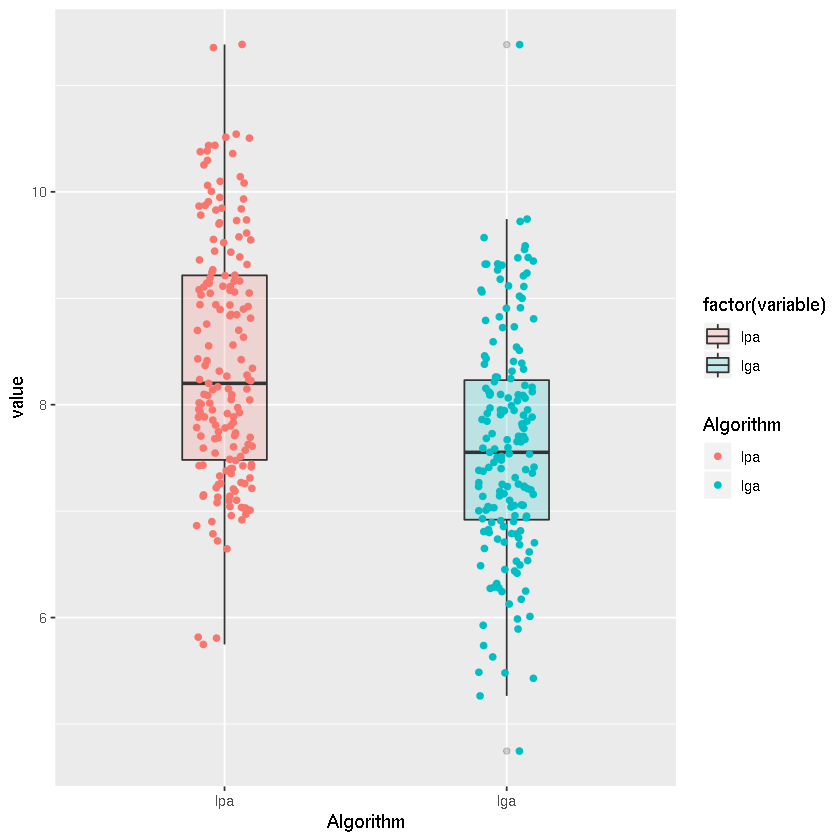

In [72]:
ggplot(melted_vols, aes(x=variable, y=value)) +
    geom_boxplot(alpha = 0.2, width = 0.3, aes(fill=factor(variable))) +
    xlab('Algorithm') +
    theme(strip.text.x = element_text(size=9, color="black", face="bold")) +
    guides(color=guide_legend("Algorithm")) +
    geom_jitter(position=position_jitter(width=0.1), aes(colour=factor(variable)), alpha=1)

In [74]:
wilcox.test(c(log(vols['lpa']))$lpa, c(log(vols['lga']))$lga, paired = TRUE)


	Wilcoxon signed rank test with continuity correction

data:  c(log(vols["lpa"]))$lpa and c(log(vols["lga"]))$lga
V = 14149, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
